# DFBA
This section describes how to run dynamic FBA (DFBA) with `sbmlutils`.

In [1]:
from __future__ import absolute_import, print_function
import os
import sbmlutils
from sbmlutils import dfba
from sbmlutils.dfba import utils

## Simulate DFBA model
To run an existing DFBA model call use `simulate_dfba`.

In [2]:
# get the absolute path to the top model
from sbmlutils.dfba.toy_wholecell import settings as toysettings
from sbmlutils.dfba.toy_wholecell import model_factory as toyfactory
from sbmlutils.dfba.toy_wholecell import simulate as toysimulate

sbml_path = os.path.join(utils.versioned_directory(toysettings.out_dir, toyfactory.version), 
                         toysettings.top_file)
print(sbml_path)

# run simulation with the top model
from sbmlutils.dfba.simulator import simulate_dfba
df, dfba_model, dfba_simulator = simulate_dfba(sbml_path, tend=50, dt=5.0)
df

/home/mkoenig/git/sbmlutils/sbmlutils/dfba/toy_wholecell/results/v11/toy_wholecell_top.xml

Simulation time     : 0.025 [s]
Total time          : 0.100 [s]
Overhead time       : 0.075 [s] (75.2 %)



,time,[A],[C],[D],[dummy_S],[fba__A],[fba__B1],[fba__B2],[fba__C],EX_A,...,fba__ub_default,fba__zero,k_R4,lb_EX_A,lb_EX_C,pEX_A,pEX_C,ub_EX_A,ub_EX_C,ub_R1
0.0,0.0,10.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.000000,...,1000.0,0.0,0.1,-100.000000,0.000000,-1.000000,1.000000,1000.0,1000.0,1.000000
5.0,5.0,5.000000,3.934695,1.065305,0.0,0.0,0.0,0.0,0.0,-0.367876,...,1000.0,0.0,0.1,-50.000000,-39.346952,-0.367876,0.367876,1000.0,1000.0,0.367876
10.0,10.0,3.160620,3.833993,3.005387,0.0,0.0,0.0,0.0,0.0,-0.135336,...,1000.0,0.0,0.1,-31.606200,-38.339927,-0.135336,0.135336,1000.0,1000.0,0.135336
15.0,15.0,2.483940,2.857942,4.658119,0.0,0.0,0.0,0.0,0.0,-0.049788,...,1000.0,0.0,0.1,-24.839396,-28.579416,-0.049788,0.049788,1000.0,1000.0,0.049788
20.0,20.0,2.234999,1.929331,5.835669,0.0,0.0,0.0,0.0,0.0,-0.018316,...,1000.0,0.0,0.1,-22.349992,-19.293315,-0.018316,0.018316,1000.0,1000.0,0.018316
25.0,25.0,2.143418,1.242269,6.614314,0.0,0.0,0.0,0.0,0.0,-0.006738,...,1000.0,0.0,0.1,-21.434178,-12.422687,-0.006738,0.006738,1000.0,1000.0,0.006738
30.0,30.0,2.109726,0.779988,7.110286,0.0,0.0,0.0,0.0,0.0,-0.002479,...,1000.0,0.0,0.1,-21.097264,-7.799878,-0.002479,0.002479,1000.0,1000.0,0.002479
35.0,35.0,2.097332,0.482841,7.419827,0.0,0.0,0.0,0.0,0.0,-0.000912,...,1000.0,0.0,0.1,-20.973319,-4.828407,-0.000912,0.000912,1000.0,1000.0,0.000912
40.0,40.0,2.092772,0.296446,7.610782,0.0,0.0,0.0,0.0,0.0,-0.000335,...,1000.0,0.0,0.1,-20.927721,-2.964463,-0.000335,0.000335,1000.0,1000.0,0.000335
45.0,45.0,2.091095,0.181124,7.727781,0.0,0.0,0.0,0.0,0.0,-0.000123,...,1000.0,0.0,0.1,-20.910947,-1.811240,-0.000123,0.000123,1000.0,1000.0,0.000123


## Toy example

Create directory: /tmp/tmppagpkwjm/v11
Annotating: <UnitDefinition s "second"> BQB_IS http://identifiers.org/uo/UO:0000010
Annotating: <UnitDefinition kg "kilogram"> BQB_IS http://identifiers.org/uo/UO:0000009
Annotating: <UnitDefinition m "meter"> BQB_IS http://identifiers.org/uo/UO:0000008
Annotating: <UnitDefinition m2 "square meter"> BQB_IS http://identifiers.org/uo/UO:0000080
Annotating: <UnitDefinition m3 "cubic meter"> BQB_IS http://identifiers.org/uo/UO:0000096
Annotating: <UnitDefinition mM "millimolar"> BQB_IS http://identifiers.org/uo/UO:0000063
Annotating: <Compartment cell "cell"> BQB_IS http://identifiers.org/sbo/SBO:0000290
Annotating: <Compartment cell "cell"> BQB_IS http://identifiers.org/go/GO:0005623
Annotating: <Compartment cell "cell"> BQB_IS http://identifiers.org/fma/FMA:68646
Annotating: <Compartment extern "external compartment"> BQB_IS http://identifiers.org/sbo/SBO:0000290
Annotating: <Compartment membrane "membrane"> BQB_IS http://identifiers.org/sbo/SBO:000

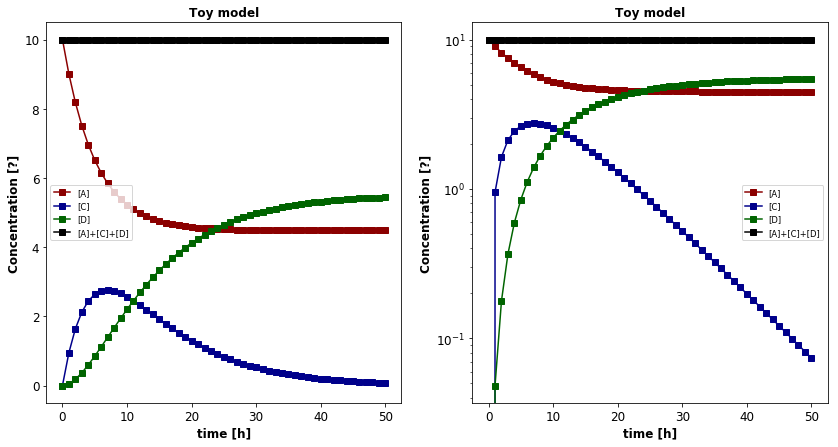

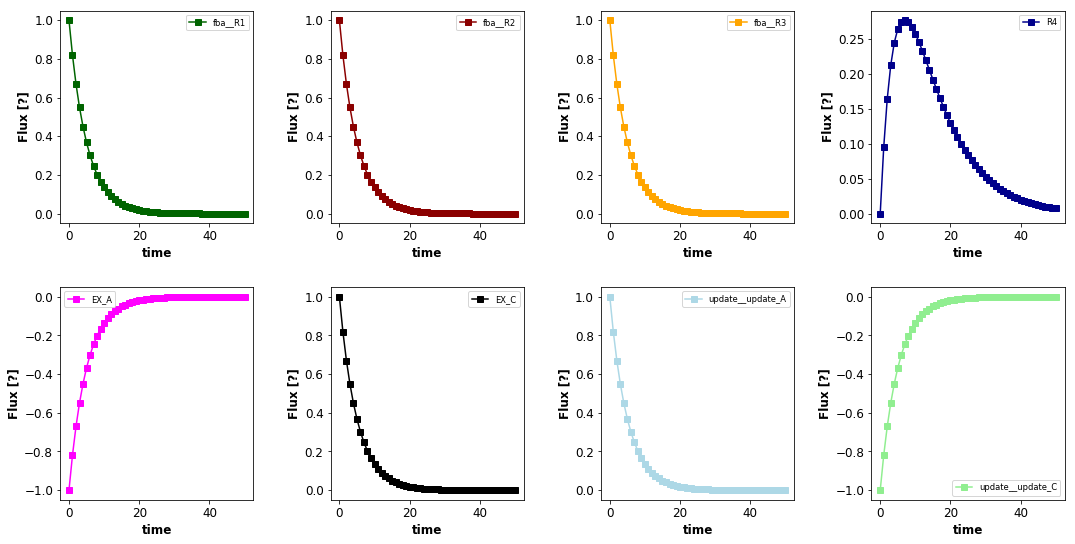

     time        [A]       [C]       [D]  [dummy_S]  [fba__A]  [fba__B1]  \
0.0   0.0  10.000000  0.000000  0.000000        0.0       0.0        0.0   
1.0   1.0   9.000000  0.951626  0.048374        0.0       0.0        0.0   
2.0   2.0   8.181269  1.640192  0.178539        0.0       0.0        0.0   
3.0   3.0   7.510949  2.122001  0.367049        0.0       0.0        0.0   
4.0   4.0   6.962138  2.442333  0.595529        0.0       0.0        0.0   

     [fba__B2]  [fba__C]      EX_A    ...     fba__ub_default  fba__zero  \
0.0        0.0       0.0 -1.000000    ...              1000.0        0.0   
1.0        0.0       0.0 -0.818731    ...              1000.0        0.0   
2.0        0.0       0.0 -0.670320    ...              1000.0        0.0   
3.0        0.0       0.0 -0.548811    ...              1000.0        0.0   
4.0        0.0       0.0 -0.449323    ...              1000.0        0.0   

     k_R4     lb_EX_A    lb_EX_C     pEX_A     pEX_C  ub_EX_A  ub_EX_C  \
0.0   0.1 -1

In [3]:
from sbmlutils.dfba.toy_wholecell import settings as toysettings
from sbmlutils.dfba.toy_wholecell import model_factory as toyfactory
from sbmlutils.dfba.toy_wholecell import simulate as toysimulate

import tempfile
test_dir = tempfile.mkdtemp()

# create the toy model
toyfactory.create_model(test_dir)
# here the files are generated
sbml_path = os.path.join(utils.versioned_directory(test_dir, toyfactory.version),
                         toysettings.top_file)
print(sbml_path)
# simulate
dfs = toysimulate.simulate_toy(sbml_path, test_dir, dts=[1.0], figures=False)

toysimulate.print_species(dfs=dfs)
toysimulate.print_fluxes(dfs=dfs)
print(dfs[0].head())

## Diauxic growth

Create directory: /tmp/tmp46mxugbu/v12


Annotating: <Model diauxic_fba "diauxic (FBA)"> BQB_IS_VERSION_OF http://identifiers.org/go/GO:0006007
Annotating: <UnitDefinition h "hour"> BQB_IS http://identifiers.org/uo/UO:0000032
Annotating: <UnitDefinition m "meter"> BQB_IS http://identifiers.org/uo/UO:0000008
Annotating: <UnitDefinition m2 "cubic meter"> BQB_IS http://identifiers.org/uo/UO:0000080
Annotating: <Species Glcxt "glucose"> BQB_IS http://identifiers.org/sbo/SBO:0000247
Annotating: <Species Glcxt "glucose"> BQB_IS http://identifiers.org/chebi/CHEBI:4167
Annotating: <Species Glcxt "glucose"> BQB_IS http://identifiers.org/kegg.compound/C00031
Annotating: <Species Ac "acetate"> BQB_IS http://identifiers.org/sbo/SBO:0000247
Annotating: <Species Ac "acetate"> BQB_IS http://identifiers.org/chebi/CHEBI:15366
Annotating: <Species Ac "acetate"> BQB_IS http://identifiers.org/kegg.compound/C00033
Annotating: <Species O2 "oxygen"> BQB_IS http://identifiers.org/sbo/SBO:0000247
Annotating: <Species O2 "oxygen"> BQB_IS http://identi

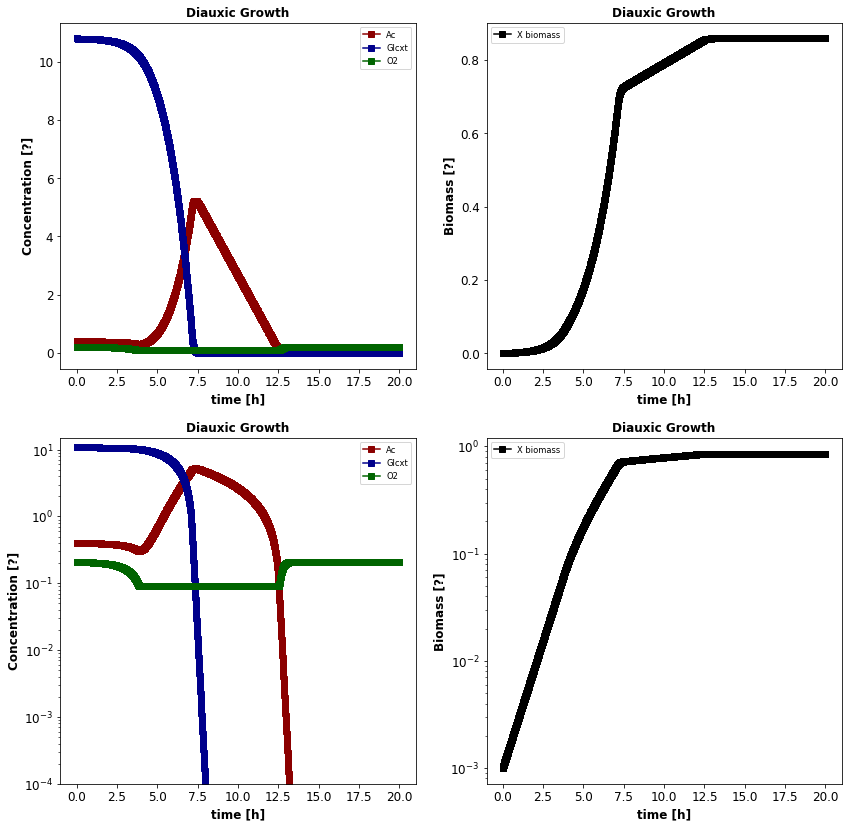

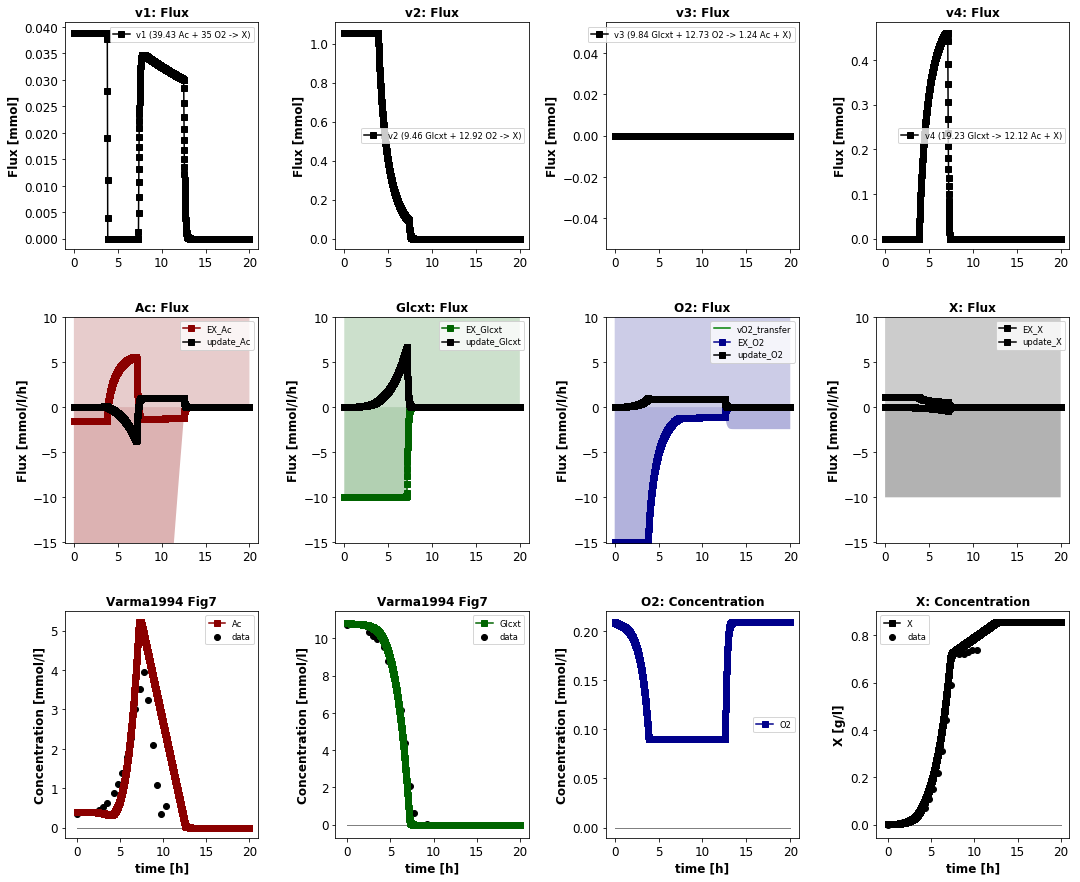

      time      [Ac]    [Glcxt]      [O2]       [X]  [dummy_S]  [fba__Ac]  \
0.00  0.00  0.400000  10.800000  0.210000  0.001000        0.0        0.0   
0.01  0.01  0.399985  10.799900  0.209855  0.001011        0.0        0.0   
0.02  0.02  0.399969  10.799798  0.209719  0.001022        0.0        0.0   
0.03  0.03  0.399953  10.799695  0.209591  0.001033        0.0        0.0   
0.04  0.04  0.399937  10.799592  0.209470  0.001045        0.0        0.0   

      [fba__Glcxt]  [fba__O2]  [fba__X]   ...     lb_EX_O2  lb_EX_X    pEX_Ac  \
0.00           0.0        0.0       0.0   ...        -15.0    -10.0 -1.533756   
0.01           0.0        0.0       0.0   ...        -15.0    -10.0 -1.533756   
0.02           0.0        0.0       0.0   ...        -15.0    -10.0 -1.533757   
0.03           0.0        0.0       0.0   ...        -15.0    -10.0 -1.533757   
0.04           0.0        0.0       0.0   ...        -15.0    -10.0 -1.533757   

      pEX_Glcxt  pEX_O2     pEX_X  ub_EX_Ac  ub_EX

In [4]:
from sbmlutils.dfba.diauxic_growth import dgsettings
from sbmlutils.dfba.diauxic_growth import model_factory as dgfactory
from sbmlutils.dfba.diauxic_growth import simulate as dgsimulate
from sbmlutils.dfba.diauxic_growth import analyse as dganalyse

import tempfile
test_dir = tempfile.mkdtemp()

# create the model
dgfactory.create_model(test_dir)

# top model file
sbml_path = os.path.join(utils.versioned_directory(test_dir, dgfactory.version),
                         dgsettings.top_file)
print(sbml_path)

# run DFBA
dfs = dgsimulate.simulate_diauxic_growth(sbml_path, test_dir, dts=[0.01], figures=False)

# plot results
dganalyse.print_species(dfs=dfs)
dganalyse.print_fluxes(dfs=dfs)
print(dfs[0].head())